Import required libraries

In [22]:
import pandas as pd
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
%matplotlib inline

Load the data from CSV

In [2]:
df = pd.read_csv('./data/preprocessed.csv')

Extract `reply_tokenized` and `reply_preprocessed` columns as lists of string

In [3]:
df['reply_tokenized'] = df['reply_tokenized'].apply(eval)
df['reply_preprocessed'] = df['reply_preprocessed'].apply(eval)

In [4]:
df['reply_noun_token'] = df['reply_tokenized'].apply(pos_tag).apply(lambda x: [token[0] for token in x if token[1] == 'NN'])

In [5]:
df.head()

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc,reply,reply_char_count,reply_word_count,reply_tokenized,reply_preprocessed,reply_noun_token
0,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,I'm getting a ton of bugs with 5 as well (snap...,1547656134,I'm getting a ton of bugs with 5 as well (snap...,258,51,"[im, getting, ton, bugs, 5, well, snappy, line...","[im, get, ton, bug, 5, well, snappi, line, res...","[im, ton, response, reason, ability, sync, goo..."
1,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nathanwj,Goodnotes 5 is not yet compatible with the des...,1547658625,Goodnotes 5 is not yet compatible with the des...,141,27,"[goodnotes, 5, yet, compatible, desktop, app, ...","[goodnot, 5, yet, compat, desktop, app, say, r...","[desktop, app, release]"
2,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Rowyfo,I haven't downloaded GN5 yet but watched a wal...,1547662874,I haven't downloaded GN5 yet but watched a wal...,168,31,"[havent, downloaded, gn5, yet, watched, walkth...","[havent, download, gn5, yet, watch, walkthroug...","[havent, gn5, see, option, check, uncheck]"
3,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,"That sounds a lot like what's going on, thanks!",1547663080,"That sounds a lot like what's going on, thanks!",47,9,"[sounds, lot, like, whats, going, thanks]","[sound, lot, like, what, go, thank]",[]
4,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nongaussian,I will probably stick to GoodNotes 4 for a whi...,1547675267,I will probably stick to GoodNotes 4 for a whi...,296,57,"[probably, stick, goodnotes, 4, noticed, goodn...","[probabl, stick, goodnot, 4, notic, goodnot, 5...","[way, export, format, love, complaint, mature,..."


In [6]:
df.submission_link_flair_text.value_counts()

Question - iPad      1082
Templates             500
Question - Other      253
Review                225
Question - Mac         61
Stylus problems        54
Question - iPhone      47
Name: submission_link_flair_text, dtype: int64

In [7]:
# df_dict = {key: gb.get_group(key) for key in df.groupby('submission_link_flair_text')}

In [8]:
df_dict = dict(tuple(df.groupby('submission_link_flair_text')))

In [9]:
df_dict.keys()

dict_keys(['Question - Mac', 'Question - Other', 'Question - iPad', 'Question - iPhone', 'Review', 'Stylus problems', 'Templates'])

In [10]:
df_dict['Question - iPad'].head()

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc,reply,reply_char_count,reply_word_count,reply_tokenized,reply_preprocessed,reply_noun_token
213,b27oag,1,I haven't had GN4 and I‘m wondering if I shoul...,Question - iPad,Hey there! I've been hearing a lot about GoodN...,DipperDolphin,Probably a better option to go with Notability...,1552844607,Probably a better option to go with Notability...,120,20,"[probably, better, option, go, notability, see...","[probabl, better, option, go, notabl, see, iss...","[option, release]"
214,b27oag,1,I haven't had GN4 and I‘m wondering if I shoul...,Question - iPad,Hey there! I've been hearing a lot about GoodN...,ziekke,GN4 has its own issues that may or may not eff...,1552845869,GN4 has its own issues that may or may not eff...,441,79,"[gn4, issues, may, may, effect, id, hard, pass...","[gn4, issu, may, may, effect, id, hard, pass, ...","[effect, pass, lot, look, point, workflow, pie..."
215,b27oag,1,I haven't had GN4 and I‘m wondering if I shoul...,Question - iPad,Hey there! I've been hearing a lot about GoodN...,riverfate,I’m a long time GN4 user and didn’t have any p...,1552850606,I’m a long time GN4 user and didn’t have any p...,481,95,"[im, long, time, gn4, user, didnt, problems, g...","[im, long, time, gn4, user, didnt, problem, gn...","[time, gn4, user, didnt, address, gn, way, eas..."
216,b27oag,1,I haven't had GN4 and I‘m wondering if I shoul...,Question - iPad,Hey there! I've been hearing a lot about GoodN...,Responsible_Can,"I like GN5. But if you buy GN4, you also can g...",1552864163,"I like GN5. But if you buy GN4, you also can g...",82,20,"[like, gn5, buy, gn4, also, get, gn5, free, try]","[like, gn5, buy, gn4, also, get, gn5, free, tri]","[buy, gn4, try]"
217,b27oag,1,I haven't had GN4 and I‘m wondering if I shoul...,Question - iPad,Hey there! I've been hearing a lot about GoodN...,lorenchristxne,Was thinking of this actually since I get two ...,1552930016,Was thinking of this actually since I get two ...,93,18,"[thinking, actually, since, get, two, price, o...","[think, actual, sinc, get, two, price, one, th...","[price, thank]"


Write a function to create visualization of the most common n-grams in each topic (aka flair)

In [11]:
def plot_ngrams(corpus, topic, n=1, top=30):
    vectorizer = CountVectorizer(tokenizer=lambda text: text, ngram_range=(n, n), lowercase=False)
    X = vectorizer.fit_transform(corpus)
    ngrams = vectorizer.get_feature_names_out()
    freq = X.toarray().sum(axis=0)
    df_ngram = pd.DataFrame({'n-gram':ngrams, 'frequency': freq}).sort_values(by='frequency', ascending=False)
    df_plot = df_ngram.iloc[:top, :]
    plt.figure(figsize=(8,10))
    ax = sns.barplot(data=df_plot, x='frequency', y='n-gram')
    plt.title(f'Topic = "{topic}"\nn-gram of replies, n = {n}')
    plt.show()

Plot the most popular noun unigrams for the topic `Question - iPad`

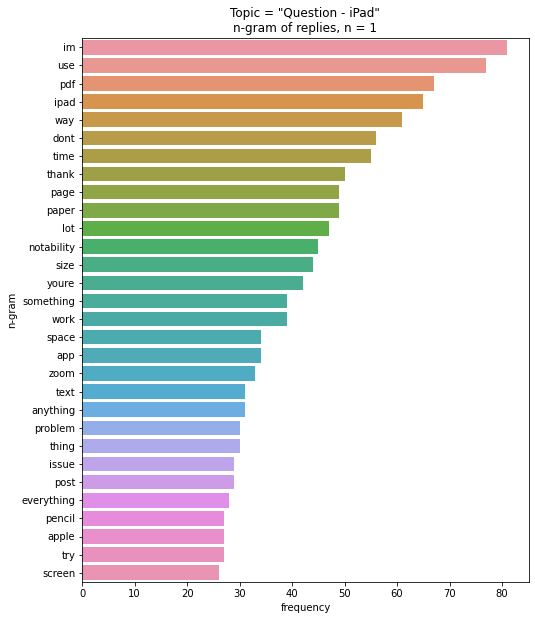

In [12]:
plot_ngrams(df_dict['Question - iPad']['reply_noun_token'], 'Question - iPad')

Plot the most popular noun bigrams for the topic `Question - iPad`

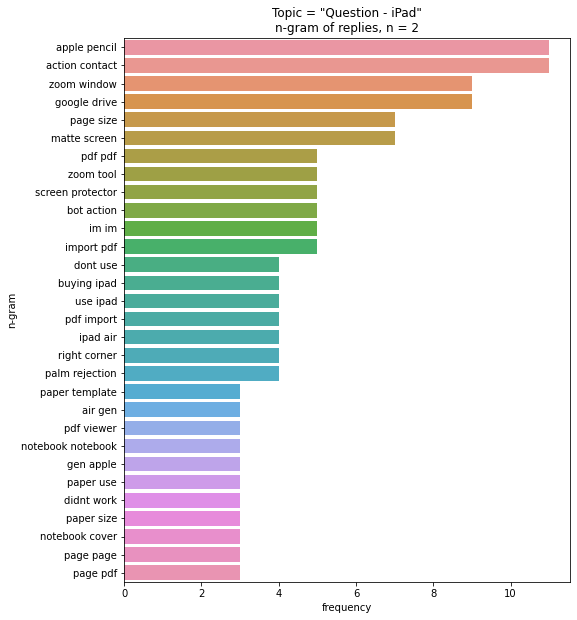

In [13]:
plot_ngrams(df_dict['Question - iPad']['reply_noun_token'], 'Question - iPad', n=2)

Plot the most popular noun trigrams for the topic `Question - iPad`

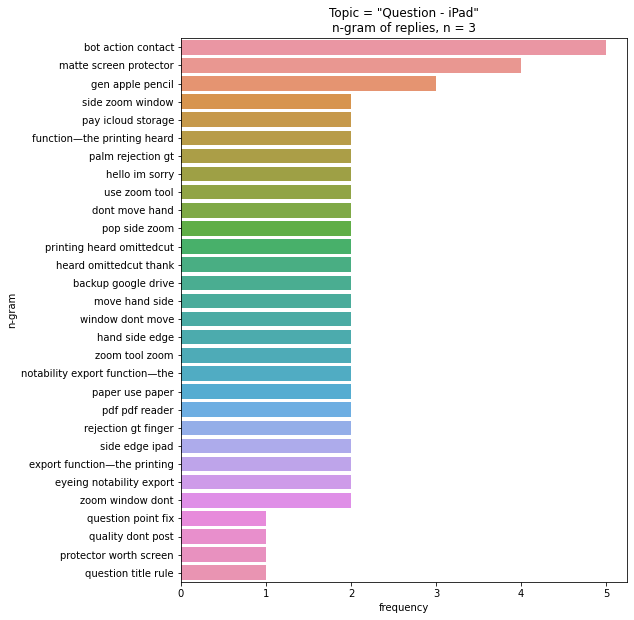

In [14]:
plot_ngrams(df_dict['Question - iPad']['reply_noun_token'], 'Question - iPad', n=3)

Generate word cloud for the most popular nouns in the topic `Question - iPad`

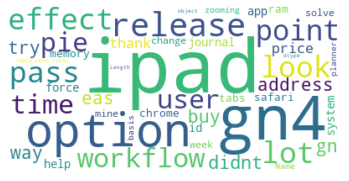

In [15]:
wordcloud = WordCloud(background_color='white').generate(str(df_dict['Question - iPad']['reply_noun_token']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Perform topic modeling to see trends of what goodnotes users are talking about in reddit

In [19]:
def generate_topic_modeling(df, num_topic=4):
    corpus=[]
    for word_list in df['reply_noun_token']:
        corpus.append(word_list)
    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = num_topic, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    lda_model.show_topics()
    
    return lda_model, bow_corpus, dic

def calculate_coherence(df):
    coherence = []
    corpus = []
    for word_list in df['reply_noun_token']:
        corpus.append(word_list)
    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    for k in range(5,25):
        print('Round: '+str(k))
        Lda = gensim.models.ldamodel.LdaModel
        ldamodel = Lda(bow_corpus, num_topics=k, id2word = dic, passes=10,\
                       iterations=200, chunksize = 10000, eval_every = None)

        cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts= df['reply_noun_token'],\
                                                         dictionary=dic, coherence='c_v')
        coherence.append((k,cm.get_coherence()))
    return coherence

def lda_elbow_plot(df):
    coherence = calculate_coherence(df)
    x_val = [x[0] for x in coherence]
    y_val = [x[1] for x in coherence]
    plt.plot(x_val,y_val)
    plt.scatter(x_val,y_val)
    plt.title('Number of Topics vs. Coherence')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence')
    plt.xticks(x_val)
    plt.show()

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


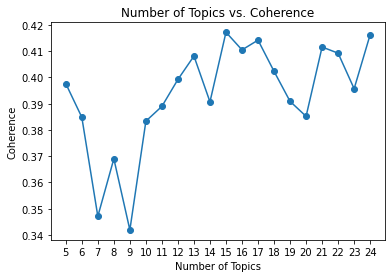

In [20]:
lda_elbow_plot(df_dict['Question - iPad'])

In [21]:
topic_lda_model, topic_bow_corpus, topic_dic = generate_topic_modeling(df_dict['Review'], num_topic=13)
topic_lda_model.show_topics()

[(6,
  '0.032*"vote" + 0.032*"wow" + 0.024*"trump" + 0.016*"thank" + 0.016*"love" + 0.016*"app" + 0.008*"please" + 0.008*"post" + 0.008*"aka" + 0.008*"plain"'),
 (2,
  '0.038*"didnt" + 0.031*"research" + 0.030*"im" + 0.016*"history" + 0.008*"figure" + 0.008*"game" + 0.008*"time" + 0.008*"need" + 0.008*"example" + 0.008*"community"'),
 (3,
  '0.027*"🤤" + 0.027*"video" + 0.027*"mine" + 0.027*"feel" + 0.014*"class" + 0.014*"recognition" + 0.014*"time" + 0.014*"tbf" + 0.014*"theyre" + 0.014*"oof"'),
 (4,
  '0.034*"please" + 0.014*"thank" + 0.014*"upvote" + 0.014*"rbanglaaudiobook" + 0.014*"oh" + 0.014*"post" + 0.014*"join" + 0.007*"yeah" + 0.007*"😗" + 0.007*"u"'),
 (1,
  '0.036*"im" + 0.036*"price" + 0.024*"color" + 0.024*"change" + 0.013*"study" + 0.013*"shadow" + 0.013*"look" + 0.013*"lot" + 0.013*"feature" + 0.013*"error"'),
 (12,
  '0.062*"thank" + 0.021*"action" + 0.021*"highlighter" + 0.021*"lol" + 0.021*"zoom" + 0.021*"use" + 0.014*"lot" + 0.014*"contact" + 0.014*"broadcast" + 0.014

Use pyLDAvis to visualize the LDA result

In [23]:
topic_lda_viz = gensimvis.prepare(topic_lda_model, topic_bow_corpus, topic_dic)

/Users/shen/opt/miniconda3/envs/opinion_mining_2/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shen/opt/miniconda3/envs/opinion_mining_2/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shen/opt/miniconda3/envs/opinion_mining_2/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shen/opt/miniconda3/envs/opinion_mining_2/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp im

In [24]:
pyLDAvis.display(topic_lda_viz)

Findings:
- In one of the distinc topics, users were talking about `class`, `write`, `reason`, `study`. This suggests that the users were students or assumed the role of a student while using the app for notetaking. Some might be reviewing their experience of how the app served their studying or in-class needs
- In another distinct, topic, users were mentioning terms like `shape`, `tool`, `rectangle`, `color`. This suggests that the users were commenting on particular features of the notetaking app and providing feedback about them

Export LDA visualization as HTML

In [ ]:
pyLDAvis.save_html(topic_lda_viz, './lda.html')